# LeNet -5

In [ ]:
%load_ext tensorboard

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

In [ ]:
num_classes = 2
class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    # 6 : 필터 개수
    # kernel_size : 커널의 행과 열
    # strides : 필터 적용하는 간격
    self.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'relu',
                    input_shape = input_shape, padding ='same'))
    
    # pool_size : 연산범위, 필터크기
    self.add(AveragePooling2D(pool_size= (2, 2), strides = (2, 2), padding = 'valid'))
    self.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'relu'))
    self.add(AveragePooling2D(pool_size = (2, 2), strides =(2, 2), padding = 'valid'))
    self.add(Flatten())
    self.add(Dense(120, activation = 'relu'))
    self.add(Dense(84, activation = 'relu'))
    self.add(Dense(nb_classes, activation = 'softmax'))

    self.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['acc'])
    

In [ ]:
model = LeNet((100, 100, 3), num_classes)
model.summary()

Model: "le_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d_1 (Average (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               1015800   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                101

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = '경로;'
valid_dir = '경로'

In [ ]:
train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1
)

train_generator = train.flow_from_directory(train_dir,
                                            target_size = (image_height, image_width),
                                            color_mode = 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed = 1,
                                            shuffle = True,
                                            class_mode = 'categorical'
                                            )
valid = ImageDataGenerator(rescale =  1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size = (image_height, image_width),
                                            color_mode= 'rgb',
                                            batch_size = BATCH_SIZE,
                                            seed =7,
                                            shuffle = True,
                                            class_mode = 'categorical'
                                            )

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
log_dir ='/content/'

# log_dir : 파일이 기록될 위치
# histogram_freq : 매 에포크마다 출력을 히스토그램에 저장
# profile_batch : 훈련이 진행되는 시간 및 시스템 자원등에 대한 사용을 관리하는 것
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir,
                                                      histogram_freq = 1,
                                                      profile_batch = 0)

# steps_per_epoch : 한 에포크에서 사용한 스텝(모델이 가진 파라미터(가중치)를 1회 업데이트 하는 것) 개수 지정
# validation_steps : 한 에포크가 종료될 때 사용되는 검증 스텝 개수 지정

model.fit(train_generator,
          epochs = EPOCHS,
          steps_per_epoch = train_num //BATCH_SIZE,
          validation_data = valid_generator,
          validation_steps = valid_num // BATCH_SIZE,
          callbacks = [tensorboard_callback],
          verbose = 1
          )

Epoch 1/100
12/12 [==============================] - 62s 5s/step - loss: 0.6902 - acc: 0.5127 - val_loss: 0.6894 - val_acc: 0.5000
Epoch 2/100
12/12 [==============================] - 7s 530ms/step - loss: 0.6866 - acc: 0.5573 - val_loss: 0.6985 - val_acc: 0.5000
Epoch 3/100
12/12 [==============================] - 7s 556ms/step - loss: 0.6864 - acc: 0.5411 - val_loss: 0.6960 - val_acc: 0.5521
Epoch 4/100
12/12 [==============================] - 7s 566ms/step - loss: 0.6804 - acc: 0.5751 - val_loss: 0.6911 - val_acc: 0.5625
Epoch 5/100
12/12 [==============================] - 7s 562ms/step - loss: 0.6823 - acc: 0.6034 - val_loss: 0.6883 - val_acc: 0.4896
Epoch 6/100
12/12 [==============================] - 7s 566ms/step - loss: 0.6678 - acc: 0.6346 - val_loss: 0.6715 - val_acc: 0.5938
Epoch 7/100
12/12 [==============================] - 7s 566ms/step - loss: 0.6939 - acc: 0.6374 - val_loss: 0.6903 - val_acc: 0.5938
Epoch 8/100
12/12 [==============================] - 7s 572ms/step - lo

In [ ]:
# class_names = ['cat', 'dog']
# validation, label_batch = next(iter(valid_generator))
# prediction_values=np.argmax(validation,axis=1)
# fig = plt.figure(figsize=(12,8))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# for i in range(8):
#     ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
#     ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')

#     if prediction_values[i] == np.argmax(label_batch[i]):
#         ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
#     else:
#         ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

# AlexNet

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime

In [ ]:
num_classes = 2
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        # kernel_initializer : 가중치 초기화 방법 
        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding='valid', activation='relu',
                        input_shape=input_shape,
                        kernel_initializer='he_normal'))
        
        # data_format : 입력에 대한 형식 지정
        # 1. channels_last : 입력 데이터 텐서의 형식이 (배치크기, 높이, 너비, 채널)
        # 2. channels_first : (배치크기, 채널개수 , 높이 , 너비) 

        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                              padding='valid', data_format='channels_last'))

        self.add(Conv2D(256, kernel_size=(5,5), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                              padding='valid', data_format='channels_last'))

        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides=1,
                        padding='same', activation='relu',
                        kernel_initializer='he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),
                              padding='valid', data_format='channels_last'))

        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
model = AlexNet((100, 100,3 ), num_classes)
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         884

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = '경로;'
valid_dir = '경로'

train = ImageDataGenerator(
                rescale=1./255,
                rotation_range=10,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [ ]:
# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.fit(train_generator,
          epochs=EPOCHS,
          steps_per_epoch=train_num // BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

Epoch 1/100
12/12 [==============================] - 120s 7s/step - loss: 6.9913 - accuracy: 0.5411 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 4s 361ms/step - loss: 0.6957 - accuracy: 0.4844 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 4s 354ms/step - loss: 0.6942 - accuracy: 0.5078 - val_loss: 0.6936 - val_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 4s 320ms/step - loss: 0.6932 - accuracy: 0.5260 - val_loss: 0.6945 - val_accuracy: 0.5104
Epoch 5/100
12/12 [==============================] - 4s 308ms/step - loss: 0.6984 - accuracy: 0.5099 - val_loss: 0.6952 - val_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 4s 308ms/step - loss: 0.6970 - accuracy: 0.4618 - val_loss: 0.6927 - val_accuracy: 0.5104
Epoch 7/100
12/12 [==============================] - 4s 307ms/step - loss: 0.6937 - accuracy: 0.5212 - val_loss: 0.6936 - val_accuracy: 0.4896


In [ ]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

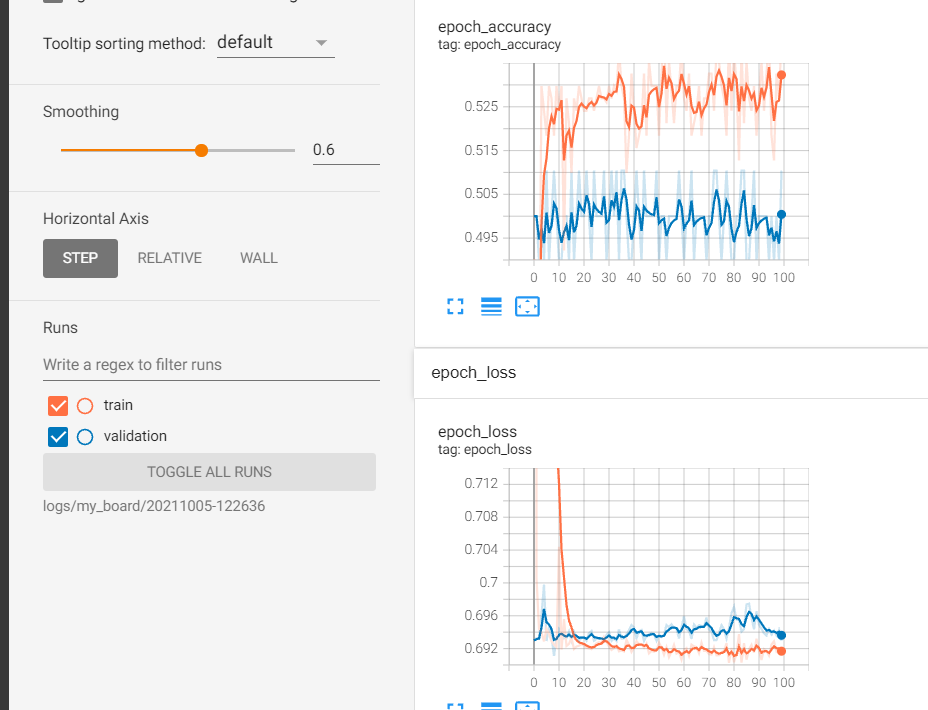

In [ ]:
# class_names = ['cat', 'dog']
# validation, label_batch = next(iter(valid_generator))
# prediction_values = model.predict(validation)
# prediction_values = np.argmax(prediction_values,axis=-1)
# fig = plt.figure(figsize=(12,8))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# for i in range(8):
#     ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
#     ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')

#     if prediction_values[i] == np.argmax(label_batch[i]):
#         ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
#     else:
#         ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

# VGG19

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu', input_shape=input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding='same',
                        activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(1000, activation='softmax'))

        self.compile(optimizer=tf.keras.optimizers.Adam(0.003),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
model = VGG19(input_shape = (224, 224, 3))
model.summary()

Model: "vg_g19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 56, 56, 256)       29516

In [ ]:
model.load_weights('경로')
classes = {282: 'cat',
           681: 'notebook, notebook computer',
           970: 'alp'} 

In [ ]:
image1 = cv2.imread('경로')
image1 = cv2.resize(image1, (224,224))
plt.figure()
plt.imshow(image1)
image1 = image1[np.newaxis, :]
predicted_value = model.predict(image1)
predicted_value = np.argmax(predicted_value,axis=-1)
plt.title(classes[predicted_value[0]])